# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

## 1. Number of samples (in one period) of the continuous signal $s(t) = \sin(\pi t)$ yielding $N$, where $N$ is a power of 2.

### a) 
Assuming $N = 8$, plot the course of the sampled signal, show the amplitude and phase spectra, and experimentally verify Parseval's theorem.

In [3]:
# Define the signal s[n] = sin(π n / 4) for n=0,...,7
N = 8
n = np.arange(N)
s = np.sin(np.pi * n / 4)

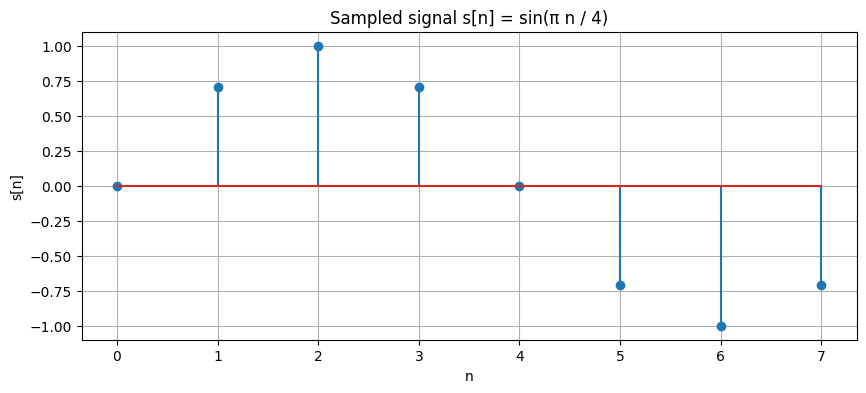

In [4]:
# Plot of the sampled signal
plt.figure(figsize=(10, 4))
plt.stem(n, s)
plt.title('Sampled signal s[n] = sin(π n / 4)')
plt.xlabel('n')
plt.ylabel('s[n]')
plt.grid(True)
plt.show()

In [5]:
# Calculate FFT of the signal
S = np.fft.fft(s)

for i in range(len(S)):
    if np.abs(S[i].imag) < 0.000001:
        S[i] = np.complex128(S[i].real, 0)

# Calculate the amplitude spectrum
amp = np.abs(S)

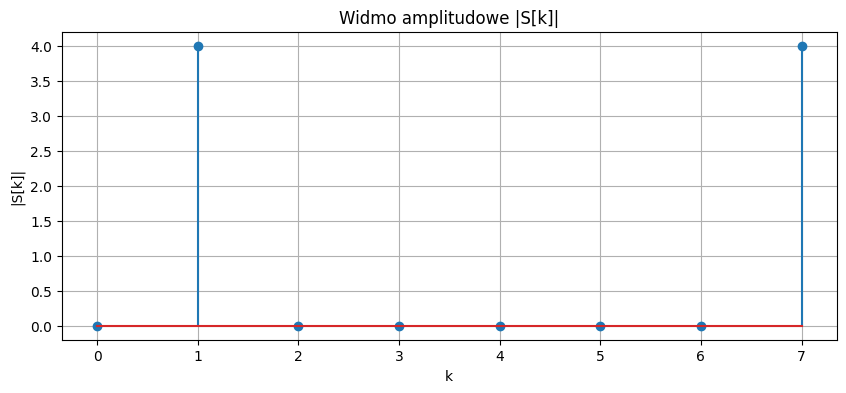

In [ ]:
# Plot the amplitude spectrum
plt.figure(figsize=(10, 4))
plt.stem(np.arange(N), amp)
plt.title('Amplitude spectrum |S[k]|')
plt.xlabel('k')
plt.ylabel('|S[k]|')
plt.grid(True)
plt.show()

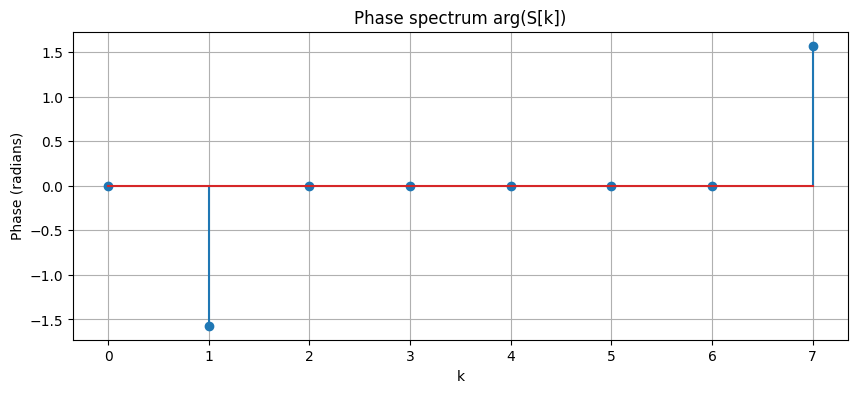

In [7]:
# Calculate the phase spectrum
phase = np.angle(S)

# Plot the phase spectrum
plt.figure(figsize=(10, 4))
plt.stem(np.arange(N), phase)
plt.title('Phase spectrum arg(S[k])')
plt.xlabel('k')
plt.ylabel('Phase (radians)')
plt.grid(True)
plt.show()

In [8]:
# Calculate and compare energy in time and frequency domains
time_energy = np.sum(s**2) 
freq_energy = (1/N) * np.sum(amp**2)
print(f'Energy in time domain: {time_energy:.6f}')
print(f'Energy in frequency domain: {freq_energy:.6f}')
print(f'Are they equal? {np.isclose(time_energy, freq_energy)}')

Energy in time domain: 4.000000
Energy in frequency domain: 4.000000
Are they equal? True


### Results and Conclusions
- In the time domain, a sinusoidal waveform was observed as a sequence of samples.  
- The amplitude spectrum of the sinusoidal signal has two main peaks.  
- The phase spectrum shows a phase shift related to the location of the peak.  
- Parseval's theorem was confirmed—the sums of energy in both domains turned out to be equal.

# b)
 Plot the course representing the time designation of the discrete signal spectrum using the FFT algorithm for the function of sample number $N = 2^l$, $l \in \mathbb{N}$. Comment on the quality of the obtained plot in relation to the theoretical accuracy of the FFT algorithm.


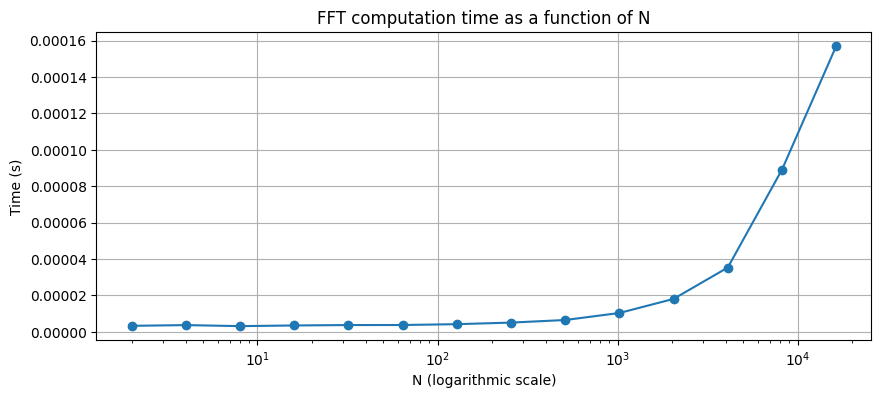

In [9]:
times = []
l_values = range(1, 15)  # l from 1 to 14, N = 2^l
for l in l_values:
    N = 2**l
    s = np.random.randn(N)  # Random signal of length N
    start_time = time.time()
    for i in range(10000):
        np.fft.fft(s)
    end_time = time.time()
    times.append((end_time - start_time) / 10000) # Average computation time for 100 trials

# Plot computation time
plt.figure(figsize=(10, 4))
plt.plot([2**l for l in l_values], times, 'o-')
plt.title('FFT computation time as a function of N')
plt.xlabel('N (logarithmic scale)')
plt.ylabel('Time (s)')
plt.xscale('log')
plt.grid(True)
plt.show()

### Results and Conclusions

- According to theory, the computation time of the FFT increases approximately as $O(N \log N)$.
- For small $N$, the differences are minor, but for larger $N$, the benefits of FFT become significant.

### 2. Investigate the effect of shifting in time on the form of the amplitude and phase spectra of a discrete harmonic signal $s[n] = A \sin\left(2\pi \frac{n}{N}\right)$ with amplitude $A = 4$ and fundamental period $N = 52$. To this end, for each value of $n_0 \in \left\{0, \frac{N}{4}, \frac{N}{2}, \frac{3N}{4}\right\}$, plot the amplitude and phase spectra of the shifted signal $s[n - n_0]$. Comment on the obtained results.

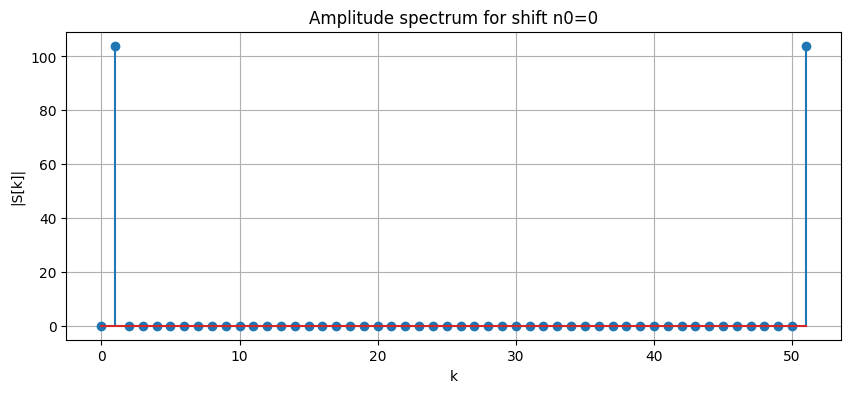

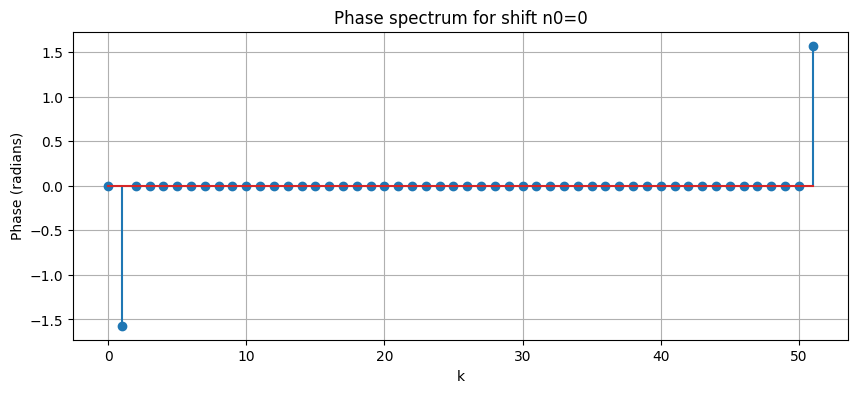

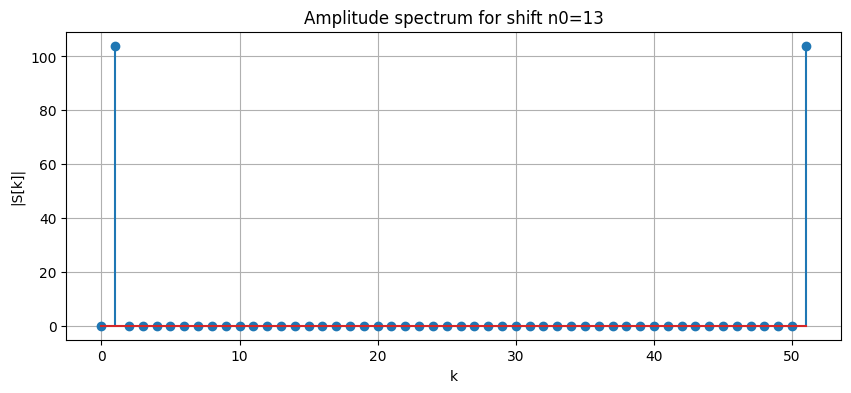

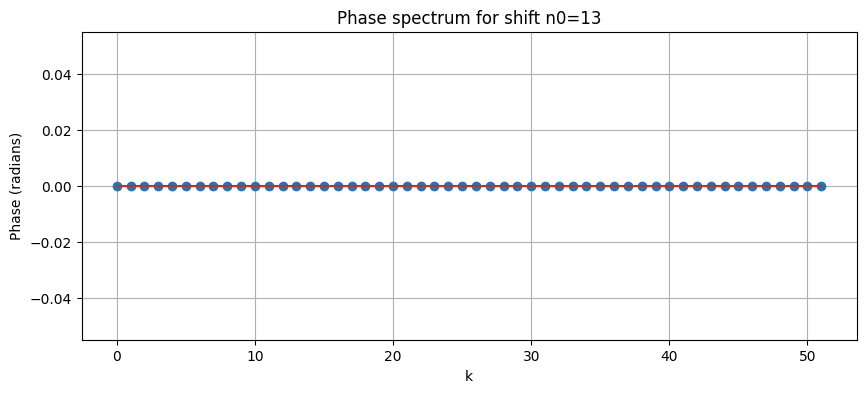

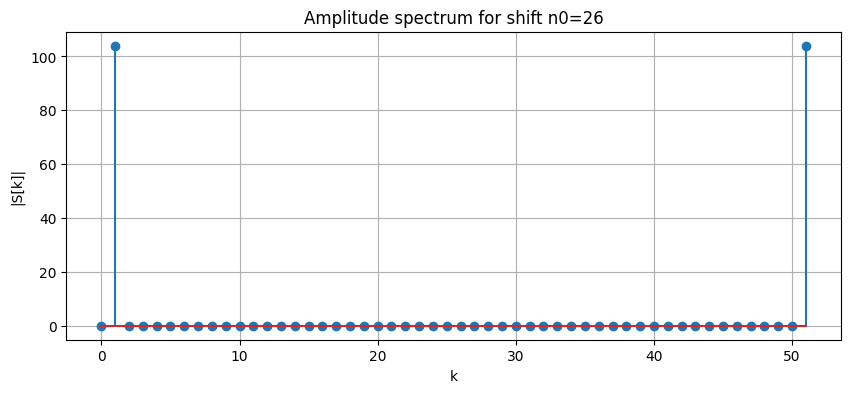

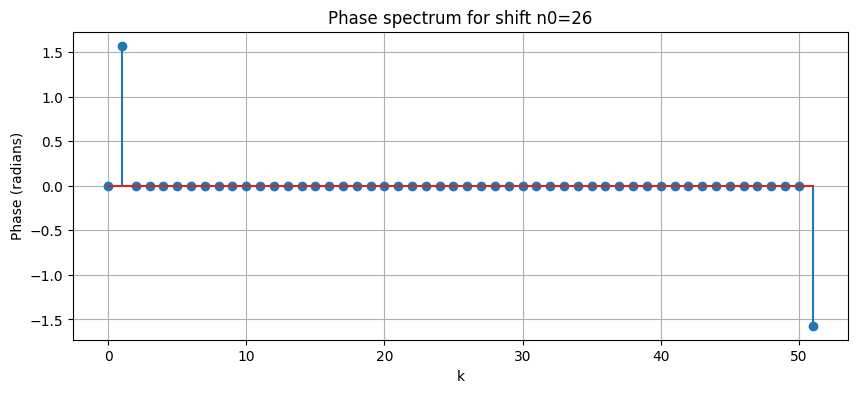

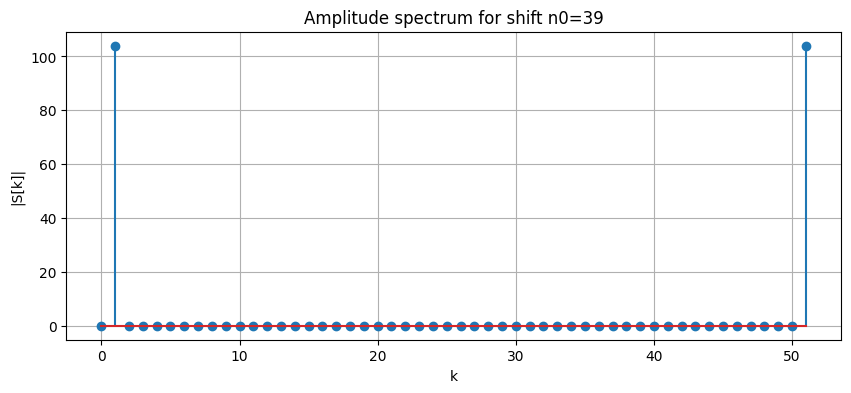

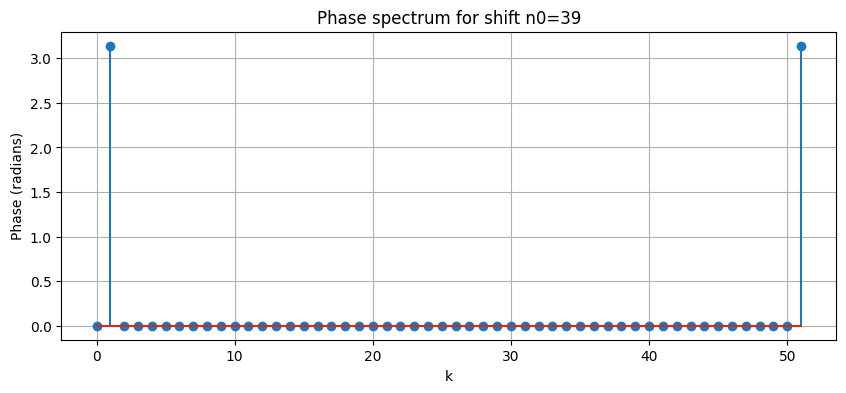

In [10]:
N = 52
A = 4
n = np.arange(N)
s = A * np.sin(2 * np.pi * n / N)  # s[n] = 4 sin(2π n / 52)

shifts = [0, 13, 26, 39]  # Shifts: 0, N/4, N/2, 3N/4
for n0 in shifts:
    s_shifted = np.roll(s, -n0)  # Shift the signal
    S_shifted = np.fft.fft(s_shifted)

    for i in range(len(S_shifted)):
        if np.abs(S_shifted[i].imag) < 0.00000000001:
            S_shifted[i] = np.complex128(S_shifted[i].real, 0)

        if np.abs(S_shifted[i].real) < 0.00000000001:
            S_shifted[i] = np.complex128(0, S_shifted[i].imag)

    amp_shifted = np.abs(S_shifted)
    phase_shifted = np.angle(S_shifted)

    # Amplitude spectrum plot
    plt.figure(figsize=(10, 4))
    plt.stem(np.arange(N), amp_shifted)
    plt.title(f'Amplitude spectrum for shift n0={n0}')
    plt.xlabel('k')
    plt.ylabel('|S[k]|')
    plt.grid(True)
    plt.show()

    # Phase spectrum plot
    plt.figure(figsize=(10, 4))
    plt.stem(np.arange(N), phase_shifted)
    plt.title(f'Phase spectrum for shift n0={n0}')
    plt.xlabel('k')
    plt.ylabel('Phase (radians)')
    plt.grid(True)
    plt.show()


### Results and Conclusions
- The amplitude spectrum remained unchanged for different shifts (the "power" of the signal and the location of the frequency peaks do not change).
- The phase spectrum changed by a value proportional to the shift \( n_0 \).
- Shifting in the time domain results only in a change of the signal's argument in the frequency domain.

### 3. Investigate the effect of zero-padding on the form of the amplitude and phase spectra of a discrete signal $s[n] = A \frac{n \mod N}{N}$ with amplitude $A = 3$ and fundamental period $N = 11$. To this end, for each value of $N_0 \in \{0, 1N, 4N, 9N\}$, plot the amplitude and phase spectra of the signal $s[n]$ padded with zeros $N_0$. Comment on the obtained results.

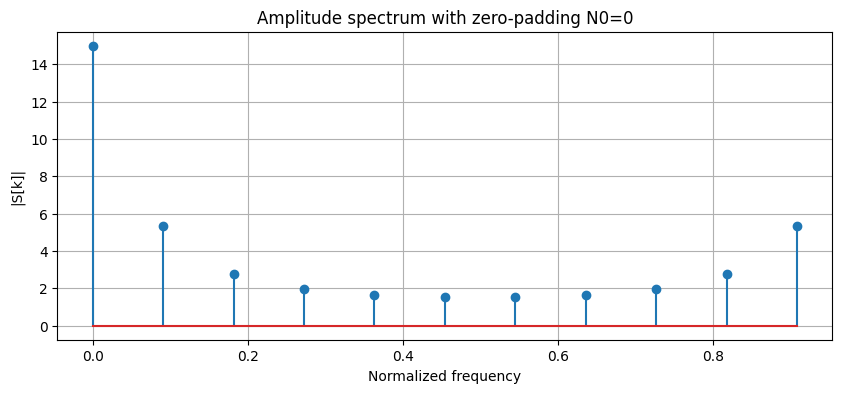

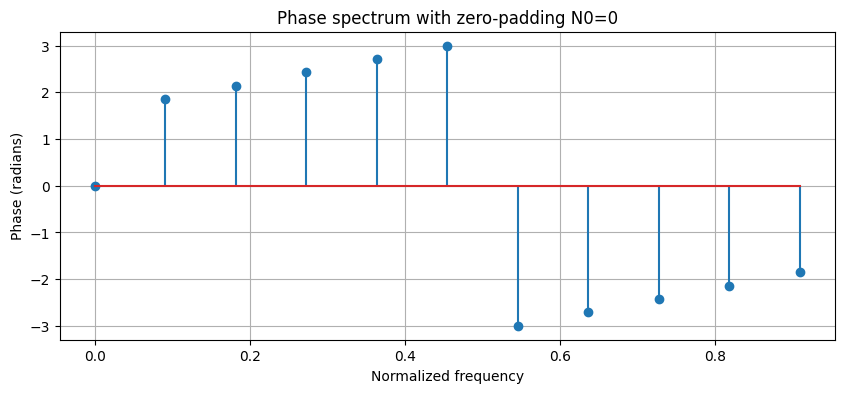

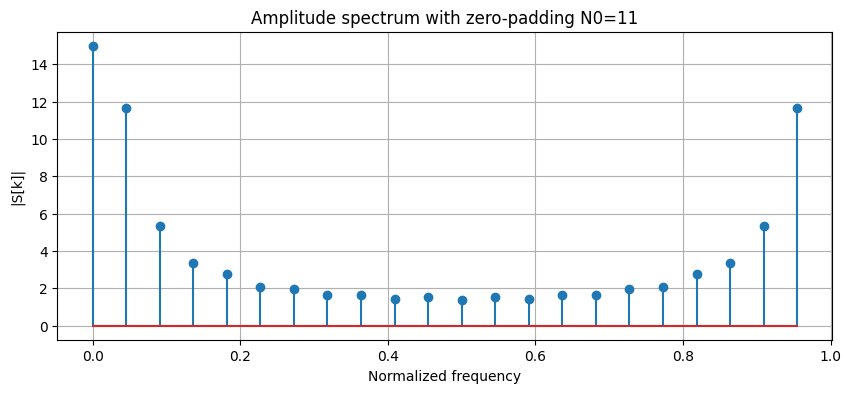

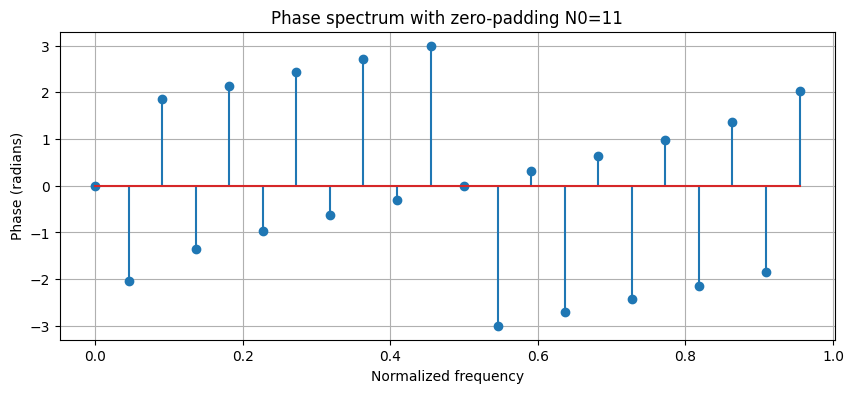

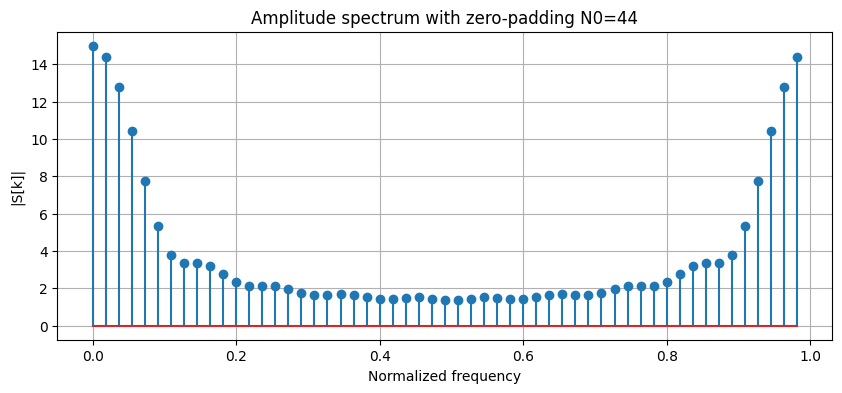

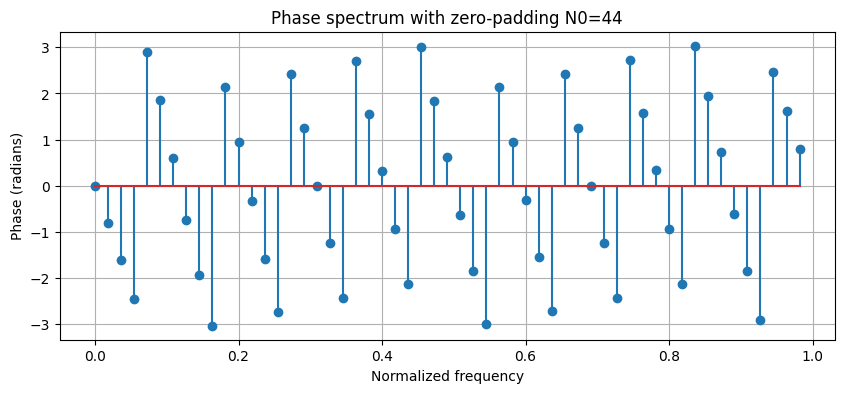

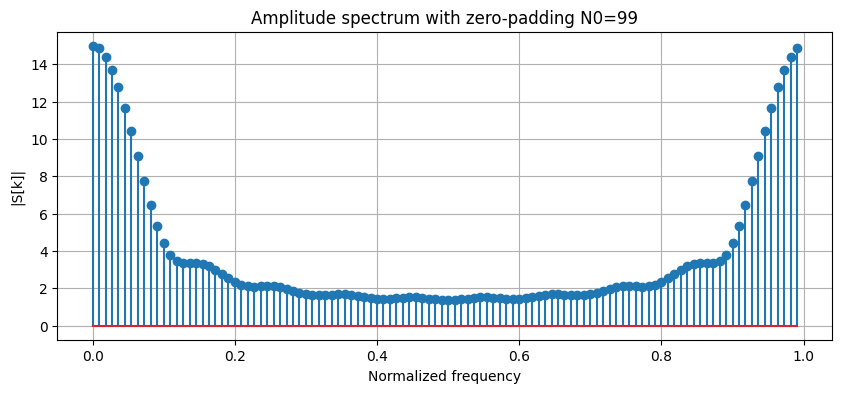

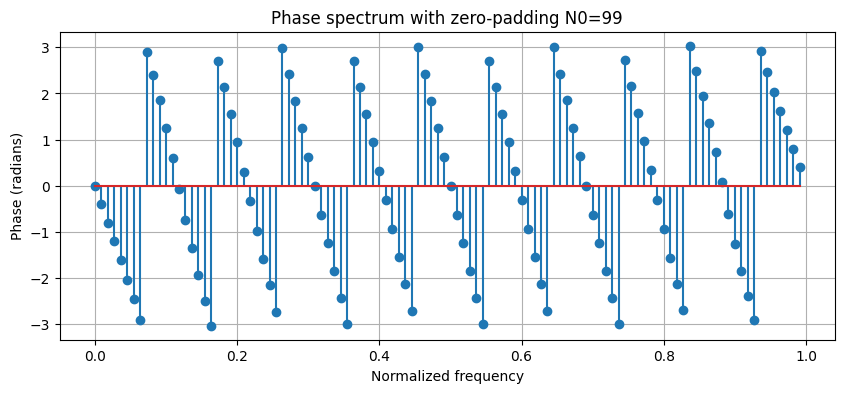

In [11]:
N = 11
A = 3
n = np.arange(N)
s = A * (n % N) / N  # s[n] = 3 (n mod 11) / 11, for n=0,...,10 it's just n

N0_values = [0, 11, 44, 99]  # Zero-padding lengths
for N0 in N0_values:
    N_total = N + N0
    s_padded = np.concatenate((s, np.zeros(N0)))  # Zero-padding
    S_padded = np.fft.fft(s_padded)

    for i in range(len(S_padded)):
        if np.abs(S_padded[i].imag) < 0.00000000001:
            S_padded[i] = np.complex128(S_padded[i].real, 0)

        if np.abs(S_padded[i].real) < 0.00000000001:
            S_padded[i] = np.complex128(0, S_padded[i].imag)

    amp_padded = np.abs(S_padded)
    phase_padded = np.angle(S_padded)
    f = np.arange(N_total) / N_total  # Normalized frequency

    # Amplitude spectrum plot
    plt.figure(figsize=(10, 4))
    plt.stem(f, amp_padded)
    plt.title(f'Amplitude spectrum with zero-padding N0={N0}')
    plt.xlabel('Normalized frequency')
    plt.ylabel('|S[k]|')
    plt.grid(True)
    plt.show()

    # Phase spectrum plot
    plt.figure(figsize=(10, 4))
    plt.stem(f, phase_padded)
    plt.title(f'Phase spectrum with zero-padding N0={N0}')
    plt.xlabel('Normalized frequency')
    plt.ylabel('Phase (radians)')
    plt.grid(True)
    plt.show()


### Results and Conclusions
- Zero-padding does not introduce additional frequency components (it does not change the actual information content of the signal).
- However, it increases the spectral resolution (discrete frequencies are more densely spaced).
- As a result, the spectrum appears more detailed, making it easier to identify and locate peaks.

### 4. The given signal is continuous $s(t) = A_1 \sin(2\pi f_1 t) + A_2 \sin(2\pi f_2 t) + A_3 \sin(2\pi f_3 t)$, where $A_1 = 0.3$, $f_1 = 5000 \, \text{Hz}$, $A_2 = 0.4$, $f_2 = 6000 \, \text{Hz}$, $A_3 = 0.5$, $f_3 = 11000 \, \text{Hz}$. Under the assumption that the sampling frequency is $f_s = 48000 \, \text{Hz}$, and the number of signal samples is $N_1 = 2048$, plot the course of the power spectral density of the sampled signal. Is it possible to determine the frequency with the given precision? Would the situation change for the number of samples $N_2 = \frac{3}{2} N_1$? Answer fundamentally.

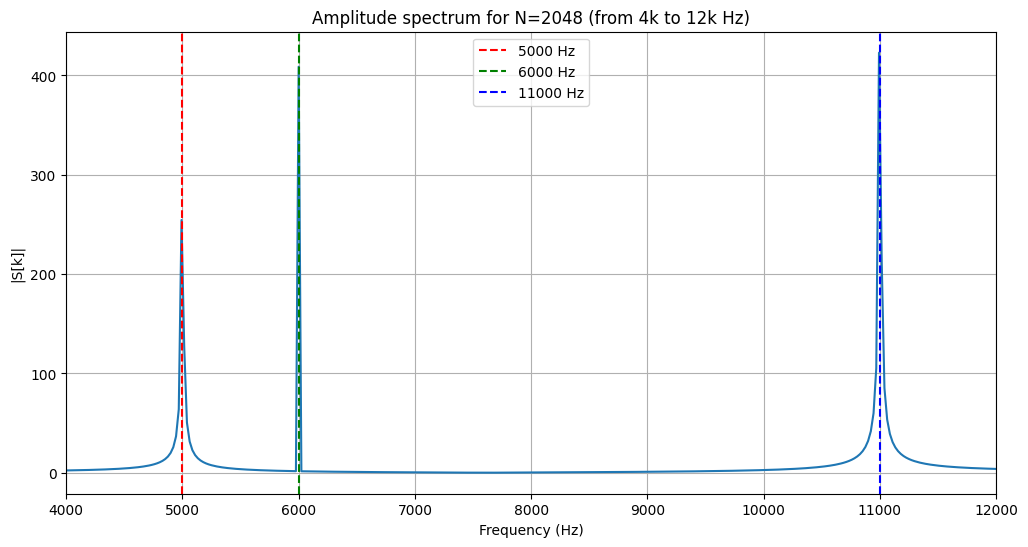

In [12]:
fs = 48000  # Sampling frequency
f1, f2, f3 = 5000, 6000, 11000  # Component frequencies
A1, A2, A3 = 0.3, 0.4, 0.5  # Amplitudes

# For N1 = 2048
N1 = 2048
t1 = np.arange(N1) / fs
s1 = A1 * np.sin(2 * np.pi * f1 * t1) + A2 * np.sin(2 * np.pi * f2 * t1) + A3 * np.sin(2 * np.pi * f3 * t1)
S1 = np.fft.fft(s1)
freq1 = np.fft.fftfreq(N1, d=1/fs)

# Amplitude spectrum plot for N1 (from 4k to 12k Hz)
plt.figure(figsize=(12, 6))
plt.plot(freq1[:N1//2], np.abs(S1[:N1//2]))
plt.xlim(4000, 12000)
plt.title('Amplitude spectrum for N=2048 (from 4k to 12k Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|S[k]|')
plt.axvline(f1, color='r', linestyle='--', label='5000 Hz')
plt.axvline(f2, color='g', linestyle='--', label='6000 Hz')
plt.axvline(f3, color='b', linestyle='--', label='11000 Hz')
plt.legend()
plt.grid(True)
plt.show()

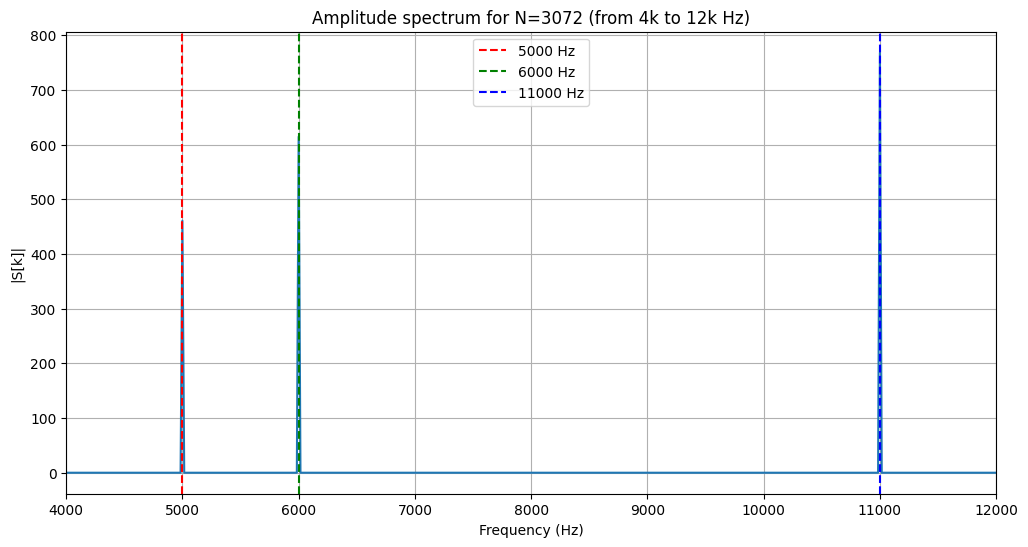

In [13]:
# For N2 = 3072
N2 = 3072
t2 = np.arange(N2) / fs
s2 = A1 * np.sin(2 * np.pi * f1 * t2) + A2 * np.sin(2 * np.pi * f2 * t2) + A3 * np.sin(2 * np.pi * f3 * t2)
S2 = np.fft.fft(s2)
freq2 = np.fft.fftfreq(N2, d=1/fs)

# Amplitude spectrum plot for N2
plt.figure(figsize=(12, 6))
plt.plot(freq2[:N2//2], np.abs(S2[:N2//2]))
plt.xlim(4000, 12000)
plt.title('Amplitude spectrum for N=3072 (from 4k to 12k Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|S[k]|')
plt.axvline(f1, color='r', linestyle='--', label='5000 Hz')
plt.axvline(f2, color='g', linestyle='--', label='6000 Hz')
plt.axvline(f3, color='b', linestyle='--', label='11000 Hz')
plt.legend()
plt.grid(True)
plt.show()

## Results and Conclusions
- For \( N_1 = 2048 \), the component frequencies do not perfectly align with the FFT grid, resulting in **spectral leakage**—the peaks are not sharp but "spread" into neighboring bins.
- Increasing the number of samples to \( N_2 \) improves frequency resolution (more discrete points in the spectrum) and reduces the effects of leakage.
